# Data Cleaning

In [2]:
import numpy as np 
import pandas as pd
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split
import regex as re
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
grammy = pd.read_csv("grammySongs_1999-2019.csv")
grammy_noms = pd.read_csv("the_grammy_awards.csv")
bb99 = pd.read_csv("billboardHot100_1999-2019.csv")
songs99 = pd.read_csv("songAttributes_1999-2019.csv")

In [4]:
grammy.head()

,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Name,Artist
0,1,0,Record Of The Year,2018,General,this is America,Childish Gambino
1,2,1,Song Of The Year,2018,General,this is America,Childish Gambino
2,3,2,Best Pop Solo Performance,2018,Pop,Joanne (where Do you Think You're Goin'?),Lady Gaga
3,4,3,Best Pop Duo/Group Performance,2018,Pop,Shallow,Lady Gaga & Bradley Cooper
4,5,4,Best Dance Recording,2018,Dance/Electronic Music,Electricity,Silk City & Dua Lipa Featuring Diplo & Mark Ro...


In [5]:
len(songs99)

154931

In [6]:
songs99.head()

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [7]:
songs99[songs99["Artist"] == "Ed Sheeran"]

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
154812,0,0.877000,x (Deluxe Edition),Ed Sheeran,0.464,252760,0.321,False,0.000000,0.0789,-11.120,1,One,67,0.0418,93.528,4,0.306
154813,1,0.556000,x (Deluxe Edition),Ed Sheeran,0.697,244573,0.377,False,0.000000,0.0999,-7.755,1,I'm a Mess,70,0.0397,138.754,4,0.336
154814,2,0.304000,x (Deluxe Edition),Ed Sheeran,0.818,235382,0.670,False,0.000001,0.0601,-4.451,0,Sing,71,0.0472,119.988,4,0.939
154815,3,0.011300,x (Deluxe Edition),Ed Sheeran,0.806,219840,0.608,False,0.000000,0.6350,-7.008,1,Don't,74,0.0659,95.049,4,0.849
154816,4,0.175000,x (Deluxe Edition),Ed Sheeran,0.791,225533,0.669,False,0.000000,0.3300,-7.189,0,Nina,61,0.1460,92.013,4,0.809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,114,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,115,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,116,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,117,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430


In [8]:
len(bb99)

97225

In [9]:
bb99.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [10]:
bb99_2 = bb99.drop(columns = ["Unnamed: 0", "Writing.Credits", "Lyrics", "Features"])

In [11]:
#extracted year from chart week
pattern = '\d{4}'
years = list()
for x in bb99_2["Week"]:
    match = re.search(pattern, x)
    year = match.group()
    years.append(int(year))
bb99_2["Year"] = years
bb99_2

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Year
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...",2019
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,2019
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...",2019
3,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop",2019
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop",2019
...,...,...,...,...,...,...,...,...,...
97220,Vitamin C,Smile,95,NaN,NaN,1999-07-12,NaN,"Jamaica,Pop",1999
97221,Collective Soul,Heavy,96,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",1999
97222,Mary Chapin Carpenter,Almost Home,97,NaN,NaN,1999-07-12,NaN,"Country,Pop",1999
97223,Q,Vivrant Thing,98,NaN,NaN,1999-07-12,NaN,Rap,1999


In [12]:
bb99_3 = bb99_2.drop(columns = ["Date", "Week", "Genre"])
bb99_3.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Year
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019
3,Khalid,Talk,4,3.0,20.0,2019
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019


In [13]:
bb10s = bb99_3[bb99_3['Year'] >= 2010]
bb10s.head()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Year
0,"Lil Nas,",Old Town Road,1,1.0,7.0,2019
1,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019
2,Billie Eilish,Bad Guy,3,2.0,13.0,2019
3,Khalid,Talk,4,3.0,20.0,2019
4,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019


In [14]:
bb10s.drop_duplicates(subset = ["Artists", "Name"]).groupby("Year").count()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart
Year,,,,,
2010,432,432,432,288,288
2011,450,450,450,299,299
2012,331,331,331,261,261
2013,353,353,353,282,282
2014,324,324,324,273,273
2015,362,362,362,287,287
2016,387,387,387,316,316
2017,441,441,441,320,320
2018,569,569,569,376,376


In [15]:
bb_song = pd.merge(bb10s, songs99, left_on = ["Name", "Artists"],
                  right_on = ["Name", "Artist"])

In [16]:
bb_song.head(40)

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Year,Unnamed: 0,Acousticness,Album,Artist,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,Jonas Brothers,Sucker,6,1.0,17.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
1,Jonas Brothers,Sucker,6,1.0,16.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
2,Jonas Brothers,Sucker,4,1.0,15.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
3,Jonas Brothers,Sucker,5,1.0,14.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
4,Jonas Brothers,Sucker,5,1.0,13.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
5,Jonas Brothers,Sucker,4,1.0,12.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
6,Jonas Brothers,Sucker,3,1.0,11.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
7,Jonas Brothers,Sucker,4,1.0,10.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
8,Jonas Brothers,Sucker,4,1.0,9.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
9,Jonas Brothers,Sucker,5,1.0,8.0,2019,12,0.04270,Happiness Begins,Jonas Brothers,...,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952


In [17]:
bb_song2 = bb_song.drop_duplicates(subset = ["Artists", "Name"])
len(bb_song2)

#Billboard Top Hits had a lot of duplicate songs since it was the weekly top ranks and many songs stay on top charts 
#for multiple weeks -> dropped all duplicates except for the most recent one since that one has the actual peak position
#Song Atttributes data was also missing a lot of songs data or we were unable to cross match due to differences in 
#song title format and the artists for the song listed. Song attributes only had the singular artists and the 
#song names said (feat. xyz) while Billboard Top 100 sometimes had more than one artist listed, or had them acknowledged
#in separate 'Feature' column, typically didnt have (feat. xyz) in title 

1350

In [18]:
bb_song2.groupby('Year').count()

,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Unnamed: 0,Acousticness,Album,Artist,Danceability,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
Year,,,,,,,,,,,,,,,,,,,,,
2010,215,215,215,166,166,215,215,215,215,215,...,215,215,215,215,215,215,215,215,215,215
2011,189,189,189,150,150,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,189
2012,170,170,170,146,146,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170
2013,166,166,166,131,131,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
2014,124,124,124,109,109,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2015,114,114,114,88,88,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2016,115,115,115,100,100,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
2017,114,114,114,86,86,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2018,115,115,115,78,78,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115


In [19]:
bb_song3 = bb_song2[bb_song2["Peak.position"].notna()]
len(bb_song3)

1079

In [20]:
bb_song4 = bb_song3.drop(columns = ["Weekly.rank", "Unnamed: 0", "Album", "Artist"])
bb_song4.head()

,Artists,Name,Peak.position,Weeks.on.chart,Year,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,Jonas Brothers,Sucker,1.0,17.0,2019,0.04270,0.842,181027,0.734,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952
17,Taylor Swift,You Need To Calm Down,2.0,2.0,2019,0.00929,0.771,171360,0.671,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714
19,Panic! At The Disco,"Hey Look Ma, I Made It",24.0,11.0,2019,0.01370,0.577,169667,0.833,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580
30,Lee Brice,Rumor,25.0,16.0,2019,0.74900,0.655,198440,0.560,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599
46,Panic! At The Disco,High Hopes,4.0,47.0,2019,0.19300,0.579,190947,0.904,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681


In [21]:
bb_grammy_song = pd.merge(bb_song4, grammy, left_on = ["Artists", "Name"],
                         right_on = ["Artist", "Name"], how = "left")
bb_grammy_song.head()

,Artists,Name,Peak.position,Weeks.on.chart,Year,Acousticness,Danceability,Duration,Energy,Explicit,...,Speechiness,Tempo,TimeSignature,Valence,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Artist
0,Jonas Brothers,Sucker,1.0,17.0,2019,0.04270,0.842,181027,0.734,False,...,0.0588,137.958,4,0.952,NaN,NaN,NaN,NaN,NaN,NaN
1,Taylor Swift,You Need To Calm Down,2.0,2.0,2019,0.00929,0.771,171360,0.671,False,...,0.0553,85.026,4,0.714,NaN,NaN,NaN,NaN,NaN,NaN
2,Panic! At The Disco,"Hey Look Ma, I Made It",24.0,11.0,2019,0.01370,0.577,169667,0.833,False,...,0.0695,107.936,4,0.580,NaN,NaN,NaN,NaN,NaN,NaN
3,Lee Brice,Rumor,25.0,16.0,2019,0.74900,0.655,198440,0.560,False,...,0.0486,140.975,4,0.599,NaN,NaN,NaN,NaN,NaN,NaN
4,Panic! At The Disco,High Hopes,4.0,47.0,2019,0.19300,0.579,190947,0.904,False,...,0.0618,82.014,4,0.681,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
g_bool = bb_grammy_song["X"].notnull().astype('int')
bb_grammy_song["Grammy"] = g_bool
bb_grammy_song2 = bb_grammy_song.drop_duplicates(subset = ["Artists", "Name"])
bb_grammy_song3 = bb_grammy_song2.drop(columns = ["Unnamed: 0", "X", "GrammyAward", "GrammyYear", "Genre", "Artist"])
bb_grammy_song3.head()

,Artists,Name,Peak.position,Weeks.on.chart,Year,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,Grammy
0,Jonas Brothers,Sucker,1.0,17.0,2019,0.04270,0.842,181027,0.734,False,0.0,0.1060,-5.065,0,81,0.0588,137.958,4,0.952,0
1,Taylor Swift,You Need To Calm Down,2.0,2.0,2019,0.00929,0.771,171360,0.671,False,0.0,0.0637,-5.617,1,89,0.0553,85.026,4,0.714,0
2,Panic! At The Disco,"Hey Look Ma, I Made It",24.0,11.0,2019,0.01370,0.577,169667,0.833,False,0.0,0.1210,-3.337,1,81,0.0695,107.936,4,0.580,0
3,Lee Brice,Rumor,25.0,16.0,2019,0.74900,0.655,198440,0.560,False,0.0,0.1150,-6.857,1,79,0.0486,140.975,4,0.599,0
4,Panic! At The Disco,High Hopes,4.0,47.0,2019,0.19300,0.579,190947,0.904,False,0.0,0.0640,-2.729,1,87,0.0618,82.014,4,0.681,0


In [23]:
#final data
music_without_nom = bb_grammy_song3.rename(columns={"Peak.position":"Peak_position", 
                                       "Weeks.on.chart":"Weeks_on_chart"})
music_without_nom['Explicit'] = music_without_nom['Explicit'].astype(int)

In [24]:
grammy_noms_over10 = grammy_noms[grammy_noms['year'] >= 2010]
grammy_noms_over10['Name'] = grammy_noms_over10['nominee'].str.partition('(')[0]
grammy_noms_over10['Nominated'] = 1
grammy_noms_final = grammy_noms_over10[['Name', 'Nominated']]

In [25]:
updated_mus = pd.merge(music_without_nom, grammy_noms_final, left_on = 'Name', right_on = 'Name', how = 'left')
updated_mus['Nominated'] = updated_mus['Nominated'].fillna(0)
grammy_inds = updated_mus[updated_mus['Grammy'] == 1].index
updated_mus.iloc[grammy_inds,-1] = 1

In [26]:
music = updated_mus
music.head()

,Artists,Name,Peak_position,Weeks_on_chart,Year,Acousticness,Danceability,Duration,Energy,Explicit,...,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence,Grammy,Nominated
0,Jonas Brothers,Sucker,1.0,17.0,2019,0.04270,0.842,181027,0.734,0,...,0.1060,-5.065,0,81,0.0588,137.958,4,0.952,0,0.0
1,Taylor Swift,You Need To Calm Down,2.0,2.0,2019,0.00929,0.771,171360,0.671,0,...,0.0637,-5.617,1,89,0.0553,85.026,4,0.714,0,0.0
2,Panic! At The Disco,"Hey Look Ma, I Made It",24.0,11.0,2019,0.01370,0.577,169667,0.833,0,...,0.1210,-3.337,1,81,0.0695,107.936,4,0.580,0,0.0
3,Lee Brice,Rumor,25.0,16.0,2019,0.74900,0.655,198440,0.560,0,...,0.1150,-6.857,1,79,0.0486,140.975,4,0.599,0,0.0
4,Panic! At The Disco,High Hopes,4.0,47.0,2019,0.19300,0.579,190947,0.904,0,...,0.0640,-2.729,1,87,0.0618,82.014,4,0.681,0,0.0


In [27]:
train = music[music["Year"] <= 2016]
test = music[music["Year"]>= 2017]

In [28]:
#regression -- predict peak position 
r_ytr = train["Peak_position"]
r_xtr = train.drop(columns = ["Peak_position"])
r_yte = test["Peak_position"]
r_xte = test.drop(columns = ["Peak_position"])

#classification -- predict whether or not the song will be nominated for a Grammy 
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])

In [29]:
music.to_csv('music_data.csv', index=False)

# Linear/Logistic Regression

In [30]:
music = pd.read_csv('music_data.csv')

train = music[music["Year"] <= 2016]
test = music[music["Year"] >= 2017]

#regression -- predict peak position 
r_ytr = train["Peak_position"]
r_xtr = train.drop(columns = ["Peak_position"])
r_yte = test["Peak_position"]
r_xte = test.drop(columns = ["Peak_position"])

#classification -- predict whether or not the song will win a grammy 
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])

## Linear Regression

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, col):
    vals = sm.add_constant(df[col]).values
    num_col = len(col) + 1
    vif = [variance_inflation_factor(vals, i) for i in range(num_col)]
    return pd.Series(vif[1:], index = col)

In [32]:
linreg1 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Acousticness + Danceability + Duration + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Speechiness + Tempo + TimeSignature + Valence + Grammy + Nominated', data = train).fit()
print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     49.74
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.66e-120
Time:                        20:15:00   Log-Likelihood:                -3914.3
No. Observations:                 896   AIC:                             7867.
Df Residuals:                     877   BIC:                             7958.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1081.3694    706.937  

In [33]:
## removed 'Nominated' (p-value of .981)
linreg2 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Acousticness + Danceability + Duration + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Speechiness + Tempo + TimeSignature + Valence + Grammy', data = train).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     52.73
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          2.25e-121
Time:                        20:15:01   Log-Likelihood:                -3914.3
No. Observations:                 896   AIC:                             7865.
Df Residuals:                     878   BIC:                             7951.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1081.8843    706.216  

In [34]:
## removed 'TimeSignature' (p-value of .938)
linreg2 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Acousticness + Danceability + Duration + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Speechiness + Tempo + Valence + Grammy', data = train).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     56.08
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          2.97e-122
Time:                        20:15:01   Log-Likelihood:                -3914.3
No. Observations:                 896   AIC:                             7863.
Df Residuals:                     879   BIC:                             7944.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1085.5064    704.282  

In [35]:
## removed 'Duration' (p-value of .923)
linreg3 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Acousticness + Danceability + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Speechiness + Tempo + Valence + Grammy', data = train).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.89
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          3.78e-123
Time:                        20:15:02   Log-Likelihood:                -3914.3
No. Observations:                 896   AIC:                             7861.
Df Residuals:                     880   BIC:                             7937.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1090.5913    701.896  

In [36]:
## removed 'Speechiness' (p-value of .678)
linreg4 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Acousticness + Danceability + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Tempo + Valence + Grammy', data = train).fit()
print(linreg4.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     64.22
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          5.04e-124
Time:                        20:15:02   Log-Likelihood:                -3914.4
No. Observations:                 896   AIC:                             7859.
Df Residuals:                     881   BIC:                             7931.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1090.2009    701.566  

In [37]:
## removed 'Acousticness' (p-value of .589)
linreg5 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Danceability + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Tempo + Valence + Grammy', data = train).fit()
print(linreg5.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     69.19
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          6.85e-125
Time:                        20:15:03   Log-Likelihood:                -3914.6
No. Observations:                 896   AIC:                             7857.
Df Residuals:                     882   BIC:                             7924.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1089.2500    701.282  

In [38]:
## removed 'Valence' (p-value of .567)
linreg6 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Danceability + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Tempo + Grammy', data = train).fit()
print(linreg6.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     74.98
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          9.10e-126
Time:                        20:15:03   Log-Likelihood:                -3914.7
No. Observations:                 896   AIC:                             7855.
Df Residuals:                     883   BIC:                             7918.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1093.1319    700.983  

In [39]:
## removed 'Instrumentalness' (p-value of .560)
linreg7 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Danceability + Energy + Explicit + Liveness + Loudness + Mode + Popularity + Tempo + Grammy', data = train).fit()
print(linreg7.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     81.83
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.16e-126
Time:                        20:15:04   Log-Likelihood:                -3914.9
No. Observations:                 896   AIC:                             7854.
Df Residuals:                     884   BIC:                             7911.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1077.5689    700.212     -1.

In [40]:
## removed 'Loudness' (p-value of .493)
linreg8 = smf.ols(formula = 'Peak_position ~ Weeks_on_chart + Year + Danceability + Energy +\
                  Explicit + Liveness + Mode + Popularity + Tempo + Grammy', data = train).fit()
print(linreg8.summary())

                            OLS Regression Results                            
Dep. Variable:          Peak_position   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     90.02
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          1.51e-127
Time:                        20:15:04   Log-Likelihood:                -3915.1
No. Observations:                 896   AIC:                             7852.
Df Residuals:                     885   BIC:                             7905.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1132.2709    695.454     -1.

In [41]:
col_names = ['Weeks_on_chart', 'Year', 'Danceability', 'Energy', 'Explicit', 
             'Liveness', 'Mode', 'Popularity', 'Tempo', 'Grammy']
VIF(train, col_names)             
             
             

Weeks_on_chart    1.061279
Year              1.130403
Danceability      1.158319
Energy            1.124299
Explicit          1.183439
Liveness          1.056428
Mode              1.051193
Popularity        1.094194
Tempo             1.072517
Grammy            1.033793
dtype: float64

In [42]:
def rmse(model, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    se = (y_test - y_pred) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [43]:
linreg8_rmse = rmse(linreg8, r_xte, 'Weeks_on_chart')
print('RMSE on testing: ', linreg8_rmse)

RMSE on testing:  46.33864520971443


## Logistic Regression

In [44]:
logreg1 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Danceability + Duration + Energy + Explicit + Instrumentalness + Liveness + Loudness + Mode + Popularity + Speechiness + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg1.summary())


Optimization terminated successfully.
         Current function value: 0.152239
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           17
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1327
Time:                        20:15:13   Log-Likelihood:                -136.41
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 0.0007312
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -269.4558    190.872     -1.412      0.158    -643.558     104.646
Peak_posit

In [45]:
## removed 'Loudness' (p-value of .924)
logreg2 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Danceability + Duration + Energy + Explicit + Instrumentalness + Liveness + Mode + Popularity + Speechiness + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.152244
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1327
Time:                        20:15:13   Log-Likelihood:                -136.41
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 0.0004328
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -267.7553    190.067     -1.409      0.159    -640.281     104.770
Peak_posit

In [46]:
## removed 'Danceability' (p-value of .913)
logreg3 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Duration + Energy + Explicit + Instrumentalness + Liveness + Mode + Popularity + Speechiness + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.152251
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           15
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1326
Time:                        20:15:13   Log-Likelihood:                -136.42
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 0.0002483
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -266.9855    190.034     -1.405      0.160    -639.445     105.474
Peak_posit

In [47]:
## removed 'Speechiness' (p-value of .778)
logreg4 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Duration + Energy + Explicit + Instrumentalness + Liveness + Mode + Popularity + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.152294
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                           14
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1324
Time:                        20:15:14   Log-Likelihood:                -136.46
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 0.0001410
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -271.8604    189.494     -1.435      0.151    -643.262      99.541
Peak_posit

In [48]:
## removed 'Duration' (p-value of .729)
logreg5 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Energy + Explicit + Instrumentalness + Liveness + Mode + Popularity + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.152359
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                           13
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1320
Time:                        20:15:14   Log-Likelihood:                -136.51
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 7.828e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -267.2540    188.475     -1.418      0.156    -636.657     102.149
Peak_posit

In [49]:
## removed 'Popularity' (p-value of .699)
logreg6 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Energy + Explicit + Instrumentalness + Liveness + Mode + Tempo + TimeSignature + Valence', data=train).fit()
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.152441
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                           12
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1315
Time:                        20:15:14   Log-Likelihood:                -136.59
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 4.237e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -251.6438    183.125     -1.374      0.169    -610.562     107.274
Peak_posit

In [50]:
## removed 'TimeSignature' (p-value of .692)
logreg7 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Energy + Explicit + Instrumentalness + Liveness + Mode + Tempo + Valence', data=train).fit()
print(logreg7.summary())

Optimization terminated successfully.
         Current function value: 0.152527
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1311
Time:                        20:15:14   Log-Likelihood:                -136.66
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 2.205e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -254.1269    182.923     -1.389      0.165    -612.649     104.395
Peak_posit

In [51]:
## removed 'Explicit' (p-value of .621)
logreg8 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Energy + Instrumentalness + Liveness + Mode + Tempo + Valence', data=train).fit()
print(logreg8.summary())

Optimization terminated successfully.
         Current function value: 0.152667
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                           10
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1303
Time:                        20:15:15   Log-Likelihood:                -136.79
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 1.141e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -247.2498    182.861     -1.352      0.176    -605.650     111.150
Peak_posit

In [52]:
## removed 'Instrumentalness' (p-value of .551)
logreg9 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Energy + Liveness + Mode + Tempo + Valence', data=train).fit()
print(logreg9.summary())

Optimization terminated successfully.
         Current function value: 0.153521
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1254
Time:                        20:15:15   Log-Likelihood:                -137.55
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 9.586e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -242.3866    183.271     -1.323      0.186    -601.592     116.819
Peak_position    

In [53]:
## removed 'Energy' (p-value of .503)
logreg10 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year + Acousticness + Liveness + Mode + Tempo + Valence', data=train).fit()
print(logreg10.summary())

Optimization terminated successfully.
         Current function value: 0.153770
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            8
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1240
Time:                        20:15:16   Log-Likelihood:                -137.78
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 4.924e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -269.7700    178.240     -1.514      0.130    -619.114      79.574
Peak_position    

In [54]:
## removed 'Liveness' (p-value of .537)
logreg11 = smf.logit(formula = 'Nominated ~ Peak_position + Weeks_on_chart + Year +\
                                Acousticness + Mode + Tempo + Valence', data=train).fit()
print(logreg11.summary())

Optimization terminated successfully.
         Current function value: 0.153972
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                  896
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1228
Time:                        20:15:17   Log-Likelihood:                -137.96
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 2.294e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -261.3745    177.588     -1.472      0.141    -609.440      86.691
Peak_position    

In [55]:
y_prob = logreg11.predict(c_xte)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index = y_prob.index)

cm = confusion_matrix(c_yte, y_pred)
print ("Confusion Matrix : \n", cm) 


Confusion Matrix : 
 [[177   0]
 [ 20   0]]


In [56]:
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('Accuracy on testing: ', acc)

Accuracy on testing:  0.8984771573604061


In [57]:
y_prob = logreg11.predict(c_xte)
y_pred = pd.Series([1 if x > 0.17 else 0 for x in y_prob], index = y_prob.index)

cm = confusion_matrix(c_yte, y_pred)
print ("Confusion Matrix : \n", cm) 


Confusion Matrix : 
 [[167  10]
 [ 17   3]]


In [58]:
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('Accuracy on testing: ', acc)

Accuracy on testing:  0.8629441624365483


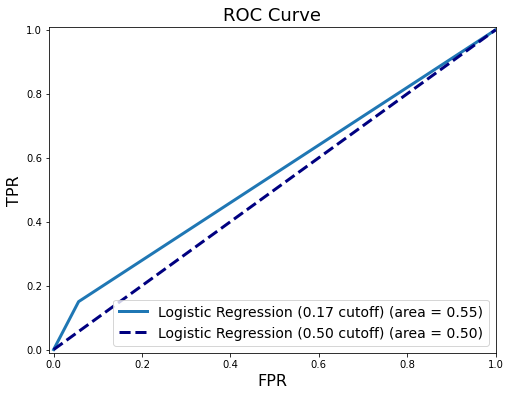

In [59]:
fpr, tpr, _ = roc_curve(c_yte, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-.01, 1.00])
plt.ylim([-.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (0.17 cutoff) (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Logistic Regression (0.50 cutoff) (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [62]:
indices = c_xte.index

y_pred_res = y_pred.astype('bool').to_numpy()
frame = {'Index':indices, 'Grammy_Nominated_Logistic':y_pred_res}
log_result = pd.DataFrame(frame)
log_result.head()

,Index,Grammy_Nominated_Logistic
0,0,False
1,1,False
2,2,False
3,3,True
4,4,False


In [63]:
log_result.to_csv('LogisticPredictions.csv', index=False)

# Neural Network

In [64]:
music = pd.read_csv('music_data.csv')

train = music[music["Year"] <= 2016]
test = music[music["Year"] >= 2017]

#regression -- predict peak position 
r_ytr = train["Peak_position"]
r_xtr = train.drop(columns = ["Peak_position"])
r_yte = test["Peak_position"]
r_xte = test.drop(columns = ["Peak_position"])

#classification -- predict whether or not the song will win a grammy 
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])


## Regression

In [65]:
import scipy.stats as stats
label = preprocessing.LabelEncoder()

y_train = label.fit_transform(r_ytr)
y_test = label.fit_transform(r_yte)

x_train = r_xtr[['Weeks_on_chart', 'Year', 'Danceability', 'Energy', 'Explicit', 
                 'Liveness', 'Mode', 'Popularity', 'Tempo', 'Grammy']]

x_train['Weeks_on_chart'] = label.fit_transform(x_train['Weeks_on_chart'])
x_train['Year'] = label.fit_transform(x_train['Year'])
x_train['Danceability'] = label.fit_transform(x_train['Danceability'])
x_train['Energy'] = label.fit_transform(x_train['Energy'])
x_train['Liveness'] = label.fit_transform(x_train['Liveness'])
x_train['Popularity'] = label.fit_transform(x_train['Popularity'])
x_train['Tempo'] = label.fit_transform(x_train['Tempo'])

x_test = r_xte[['Weeks_on_chart', 'Year', 'Danceability', 'Energy', 'Explicit', 
                'Liveness', 'Mode', 'Popularity', 'Tempo', 'Grammy']]

x_test['Weeks_on_chart'] = label.fit_transform(x_test['Weeks_on_chart'])
x_test['Year'] = label.fit_transform(x_test['Year'])
x_test['Danceability'] = label.fit_transform(x_test['Danceability'])
x_test['Energy'] = label.fit_transform(x_test['Energy'])
x_test['Liveness'] = label.fit_transform(x_test['Liveness'])
x_test['Popularity'] = label.fit_transform(x_test['Popularity'])
x_test['Tempo'] = label.fit_transform(x_test['Tempo'])

clf = MLPClassifier(hidden_layer_sizes=(50,100,150), max_iter= 200,
                     solver='lbfgs', verbose=1,  random_state=43) 
clf.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        35598     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31808D+01    |proj g|=  5.09822D+01

At iterate    1    f=  3.26015D+01    |proj g|=  4.14898D+01

At iterate    2    f=  2.99757D+01    |proj g|=  5.14563D+01

At iterate    3    f=  2.53548D+01    |proj g|=  2.75087D+01

At iterate    4    f=  1.86166D+01    |proj g|=  1.43376D+01


 This problem is unconstrained.



At iterate    5    f=  1.59589D+01    |proj g|=  7.74767D+00

At iterate    6    f=  1.42277D+01    |proj g|=  6.14369D+00

At iterate    7    f=  1.25404D+01    |proj g|=  6.33157D+00

At iterate    8    f=  1.05436D+01    |proj g|=  5.23862D+00

At iterate    9    f=  8.36293D+00    |proj g|=  3.18755D+00

At iterate   10    f=  7.04134D+00    |proj g|=  4.09644D+00

At iterate   11    f=  5.96547D+00    |proj g|=  2.36660D+00

At iterate   12    f=  5.14630D+00    |proj g|=  2.11271D+00

At iterate   13    f=  4.78784D+00    |proj g|=  7.67203D-01

At iterate   14    f=  4.65908D+00    |proj g|=  4.01786D-01

At iterate   15    f=  4.58364D+00    |proj g|=  6.33876D-01

At iterate   16    f=  4.53317D+00    |proj g|=  3.20440D-01

At iterate   17    f=  4.50850D+00    |proj g|=  1.63389D-01

At iterate   18    f=  4.48720D+00    |proj g|=  3.36658D-01

At iterate   19    f=  4.46551D+00    |proj g|=  3.16685D-01

At iterate   20    f=  4.44203D+00    |proj g|=  6.55609D-01

At iter

MLPClassifier(hidden_layer_sizes=(50, 100, 150), random_state=43,
              solver='lbfgs', verbose=1)

In [66]:
y_pred_train = clf.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on training: ', train_rmse)

y_pred_test = clf.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on testing: ', test_rmse)

RMSE on training:  21.74042790188691
RMSE on testing:  30.79224637060803


## Classification

In [67]:
import scipy.stats as stats
label = preprocessing.LabelEncoder()

y_train = c_ytr
y_test = c_yte

x_train = c_xtr[['Peak_position', 'Weeks_on_chart', 'Year', 'Acousticness', 'Mode', 'Tempo', 'Valence']]

x_train['Peak_position'] = label.fit_transform(x_train['Peak_position'])
x_train['Weeks_on_chart'] = label.fit_transform(x_train['Weeks_on_chart'])
x_train['Year'] = label.fit_transform(x_train['Year'])
x_train['Acousticness'] = label.fit_transform(x_train['Acousticness'])
x_train['Tempo'] = label.fit_transform(x_train['Tempo'])
x_train['Valence'] = label.fit_transform(x_train['Valence'])

x_test = c_xte[['Peak_position', 'Weeks_on_chart', 'Year', 'Acousticness', 'Mode', 'Tempo', 'Valence']]

x_test['Peak_position'] = label.fit_transform(x_test['Peak_position'])
x_test['Weeks_on_chart'] = label.fit_transform(x_test['Weeks_on_chart'])
x_test['Year'] = label.fit_transform(x_test['Year'])
x_test['Acousticness'] = label.fit_transform(x_test['Acousticness'])
x_test['Tempo'] = label.fit_transform(x_test['Tempo'])
x_test['Valence'] = label.fit_transform(x_test['Valence'])

clf = MLPClassifier(hidden_layer_sizes=(50,100,150), max_iter= 100,
                     solver='lbfgs', verbose=1,  random_state=43)  

clf.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        20801     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90384D+01    |proj g|=  1.25967D+02

At iterate    1    f=  1.52865D+00    |proj g|=  1.17122D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    2    f=  7.58709D-01    |proj g|=  4.84020D+00

At iterate    3    f=  7.19497D-01    |proj g|=  2.35804D+00

At iterate    4    f=  5.75410D-01    |proj g|=  1.97243D+00

At iterate    5    f=  3.51439D-01    |proj g|=  8.52531D-01

At iterate    6    f=  2.99013D-01    |proj g|=  1.63968D+00

At iterate    7    f=  2.58819D-01    |proj g|=  6.58283D-01

At iterate    8    f=  2.44830D-01    |proj g|=  7.14647D-01

At iterate    9    f=  2.31892D-01    |proj g|=  5.08408D-01

At iterate   10    f=  2.13941D-01    |proj g|=  3.55540D-01

At iterate   11    f=  1.97550D-01    |proj g|=  2.84568D-01

At iterate   12    f=  1.86002D-01    |proj g|=  1.73603D+00

At iterate   13    f=  1.71462D-01    |proj g|=  2.31289D-01

At iterate   14    f=  1.69877D-01    |proj g|=  1.87557D-01

At iterate   15    f=  1.67678D-01    |proj g|=  2.58521D-01

At iterate   16    f=  1.64303D-01    |proj g|=  1.73994D-01

At iterate   17    f=  1.58391D-01    |proj g|=  1.63391D-01

At iter

MLPClassifier(hidden_layer_sizes=(50, 100, 150), max_iter=100, random_state=43,
              solver='lbfgs', verbose=1)

In [68]:
y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy on training: ', train_accuracy)

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing: ', test_accuracy)

Accuracy on training:  0.9776785714285714
Accuracy on testing:  0.8934010152284264


In [69]:
indices = c_xte.index

y_pred_res = y_pred_test.astype('bool')
frame = {'Index':indices, 'Grammy_Nominated_NeuralNetwork':y_pred_res}
nn_result = pd.DataFrame(frame)
nn_result.head()

,Index,Grammy_Nominated_NeuralNetwork
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [70]:
nn_result.to_csv('NNPredictions.csv', index=False)

# Decision Tree

In [71]:
music = pd.read_csv('music_data.csv')

train = music[music["Year"] <= 2016]
test = music[music["Year"] >= 2017]

#regression -- predict peak position 
r_ytr = train["Peak_position"]
r_xtr = train.drop(columns = ["Peak_position"])
r_yte = test["Peak_position"]
r_xte = test.drop(columns = ["Peak_position"])

#classification -- predict whether or not the song will win a grammy 
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])

## Decision Tree Regression

In [72]:
mse = make_scorer(mean_squared_error)

In [73]:
y_train = r_ytr
y_test = r_yte
x_train = train[['Weeks_on_chart', 'Year', 'Danceability', 'Energy', 'Explicit', 'Liveness', 'Mode', 'Popularity', 'Tempo', 'Grammy']]
x_test = test[['Weeks_on_chart', 'Year', 'Danceability', 'Energy', 'Explicit', 'Liveness', 'Mode', 'Popularity', 'Tempo', 'Grammy']]


In [74]:
dt = DecisionTreeClassifier()

grid_values = {'ccp_alpha': np.linspace(0, 0.010, 201),
              'min_samples_leaf': [5],
              'min_samples_split': [20],
              'max_depth': [10],
              'random_state': [42]}
dec_tree_cv = GridSearchCV(dt, param_grid = grid_values, scoring = mse, cv = 10, verbose = 1)
dec_tree_cv.fit(x_train, y_train)


Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [42]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [75]:
acc = dec_tree_cv.cv_results_['mean_test_score']
ccp = dec_tree_cv.cv_results_['param_ccp_alpha'].data

alpha_vals = pd.DataFrame({'ccp alpha' : ccp, 'Validation RMSE' : acc**0.5})
lowest_RMSE = alpha_vals[alpha_vals['Validation RMSE'] == min(alpha_vals['Validation RMSE'])]
best_alpha = lowest_RMSE[['ccp alpha']].iloc[0,0]
best_alpha


0.00405

In [76]:
dt_updated = DecisionTreeClassifier()
grid_values_updated = {'ccp_alpha': best_alpha,
                       'min_samples_leaf': [5],
                       'min_samples_split': [20],
                       'max_depth': [10],
                       'random_state': [42]}
dec_tree_cv_updated = GridSearchCV(dt_updated, param_grid = grid_values, scoring = mse, cv = 10, verbose = 1)
dec_tree_cv_updated.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [42]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [77]:
y_pred_train = dec_tree_cv_updated.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on training: ', train_rmse)

y_pred_test = dec_tree_cv_updated.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on testing: ', test_rmse)

RMSE on training:  22.274990981239156
RMSE on testing:  24.0835053185037


## Decision Tree Classification

In [78]:
y_train = c_ytr
y_test = c_yte
x_train = train[['Peak_position', 'Weeks_on_chart', 'Year', 'Acousticness', 'Mode', 'Tempo', 'Valence']]
x_test = test[['Peak_position', 'Weeks_on_chart', 'Year', 'Acousticness', 'Mode', 'Tempo', 'Valence']]

In [79]:
dt = DecisionTreeClassifier()

grid_values = {'ccp_alpha': np.linspace(0, 0.010, 201),
              'min_samples_leaf': [5],
              'min_samples_split': [20],
              'max_depth': [10],
              'random_state': [42]}
dec_tree_cv = GridSearchCV(dt, param_grid = grid_values, scoring = 'accuracy', cv = 10, verbose = 1)
dec_tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [42]},
             scoring='accuracy', verbose=1)

In [80]:
acc = dec_tree_cv.cv_results_['mean_test_score']
ccp = dec_tree_cv.cv_results_['param_ccp_alpha'].data

alpha_vals = pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy' : acc})
highest_acc = alpha_vals[alpha_vals['Validation Accuracy'] == max(alpha_vals['Validation Accuracy'])]
best_alpha = highest_acc[['ccp alpha']].iloc[0,0]
best_alpha


0.0081

In [81]:
dt_updated = DecisionTreeClassifier()
grid_values_updated = {'ccp_alpha': best_alpha,
                       'min_samples_leaf': [5],
                       'min_samples_split': [20],
                       'max_depth': [10],
                       'random_state': [42]}
dec_tree_cv_updated = GridSearchCV(dt_updated, param_grid = grid_values, scoring = 'accuracy', cv = 10, verbose = 1)
dec_tree_cv_updated.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [42]},
             scoring='accuracy', verbose=1)

In [82]:
y_pred_train = dec_tree_cv_updated.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy on training: ', train_accuracy)

y_pred_test = dec_tree_cv_updated.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing: ', test_accuracy)

Accuracy on training:  0.9575892857142857
Accuracy on testing:  0.8984771573604061


In [84]:
indices = c_xte.index

y_pred_res = y_pred_test.astype('bool')
frame = {'Index':indices, 'Grammy_Nominated_DecisionTree':y_pred_res}
dec_tree_result = pd.DataFrame(frame)
dec_tree_result.head()

,Index,Grammy_Nominated_DecisionTree
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [85]:
dec_tree_result.to_csv('DecisionTreePredictions.csv', index=False)

# Ensemble Method

In [86]:
music = pd.read_csv('music_data.csv')

train = music[music["Year"] <= 2016]
test = music[music["Year"] >= 2017]

#regression -- predict peak position 
r_ytr = train["Peak_position"]
r_xtr = train.drop(columns = ["Peak_position"])
r_yte = test["Peak_position"]
r_xte = test.drop(columns = ["Peak_position"])

#classification -- predict whether or not the song will win a grammy 
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])

In [87]:
decision_tree_preds = pd.read_csv("DecisionTreePredictions.csv")
logistic_preds = pd.read_csv("LogisticPredictions.csv")
neural_preds = pd.read_csv("NNPredictions.csv")

In [88]:
df = pd.DataFrame()
df['Index'] = neural_preds['Index']
df['GrammyNominated_DecisionTree'] = decision_tree_preds['Grammy_Nominated_DecisionTree']
df['GrammyNominated_NeuralNetwork'] = neural_preds['Grammy_Nominated_NeuralNetwork']
df['GrammyNominated_Logistic'] = logistic_preds['Grammy_Nominated_Logistic']
df['Mean'] = (df['GrammyNominated_DecisionTree'] + df['GrammyNominated_NeuralNetwork'] + df['GrammyNominated_Logistic']) / 3
df['GrammyNominated'] = [True if test > 0.5 else False for test in df['Mean']]
df

,Index,GrammyNominated_DecisionTree,GrammyNominated_NeuralNetwork,GrammyNominated_Logistic,Mean,GrammyNominated
0,0,False,False,False,0.000000,False
1,1,False,False,False,0.000000,False
2,2,False,False,False,0.000000,False
3,3,False,False,True,0.333333,False
4,4,False,False,False,0.000000,False
...,...,...,...,...,...,...
192,192,False,False,False,0.000000,False
193,193,False,False,False,0.000000,False
194,194,False,False,False,0.000000,False
195,195,False,False,False,0.000000,False


In [89]:
final_df = df.loc[:, ['Index', 'GrammyNominated']]
final_df

,Index,GrammyNominated
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
192,192,False
193,193,False
194,194,False
195,195,False


In [90]:
y_true = c_yte.to_numpy()
y_pred = final_df['GrammyNominated'].to_numpy()
print(accuracy_score(y_true, y_pred))

0.8984771573604061
